### IMPORTING THE NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
from wordcloud import WordCloud
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']
from plotly.offline import init_notebook_mode, iplot

### READ DATASETS

In [3]:
def read_dataset():
    credits=pd.read_csv('C:\\Users\devri\Desktop\datasets\\credits.csv')
    print('"credits.csv" imported successfully!')
    titles=pd.read_csv('C:\\Users\devri\Desktop\datasets\\titles.csv')
    print('"titles.csv" imported successfully!')
    return credits, titles

In [4]:
credits, titles=read_dataset()

"credits.csv" imported successfully!
"titles.csv" imported successfully!


In [5]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


**"credits" dataset is about the actors and their characters.**

In [6]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [7]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


**"titles" dataset is about the shows or movies and their scores basically.**

In [8]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

### STATISTICAL DESCRIPTION

In [9]:
# Lets statistically describe "credits" data set
credits.describe().T.style.set_properties(**{"background-color": "#E77577", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
person_id,77801.000000,529488.806442,643016.669958,7.000000,45306.000000,198358.000000,888096.000000,2462818.000000


In [10]:
# And "titles" data set
titles.describe().T.style.set_properties(**{"background-color": "#E77577", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
release_year,5850.000000,2016.417094,6.937726,1945.000000,2016.000000,2018.000000,2020.000000,2022.000000
runtime,5850.000000,76.888889,39.002509,0.000000,44.000000,83.000000,104.000000,240.000000
seasons,2106.000000,2.162868,2.689041,1.000000,1.000000,1.000000,2.000000,42.000000
imdb_score,5368.000000,6.510861,1.163826,1.500000,5.800000,6.600000,7.300000,9.600000
imdb_votes,5352.000000,23439.382474,95820.470909,5.000000,516.750000,2233.500000,9494.000000,2294231.000000
tmdb_popularity,5759.000000,22.637925,81.680263,0.009442,2.728500,6.821000,16.590000,2274.044000
tmdb_score,5539.000000,6.829175,1.170391,0.500000,6.100000,6.900000,7.537500,10.000000


In [11]:
# Look at other information about "credits" dataset
print("Shape of the dataset: ", credits.shape)
print("_______________________________________")
print("Number of null values: ")
print(credits.isnull().sum())
print("_______________________________________")
print("Number of unique values: ")
print(credits.nunique())

Shape of the dataset:  (77801, 5)
_______________________________________
Number of null values: 
person_id       0
id              0
name            0
character    9772
role            0
dtype: int64
_______________________________________
Number of unique values: 
person_id    54589
id            5489
name         54314
character    47274
role             2
dtype: int64


In [12]:
# Look at other information about "titles" dataset
print("Shape of the dataset: ", titles.shape)
print("_______________________________________")
print("Number of null values: ")
print(titles.isnull().sum())
print("_______________________________________")
print("Number of unique values: ")
print(titles.nunique())

Shape of the dataset:  (5850, 15)
_______________________________________
Number of null values: 
id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64
_______________________________________
Number of unique values: 
id                      5850
title                   5798
type                       2
description             5829
release_year              63
age_certification         11
runtime                  202
genres                  1726
production_countries     452
seasons                   26
imdb_id                 5447
imdb_score                80
imdb_votes              3880
tmdb_popula

### CORRELATION

In [13]:
#Lets look at the correlation between attributes on our both datasets
corr=credits.corr()
corr.style.background_gradient(cmap='Reds')

,person_id
person_id,1.000000


In [14]:
corr=titles.corr()
corr.style.background_gradient(cmap='Reds')

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.173551,-0.504407,-0.129380,-0.208815,0.043244,0.032073
runtime,-0.173551,1.000000,-0.139642,-0.148068,0.139760,0.002545,-0.277454
seasons,-0.504407,-0.139642,1.000000,0.106806,0.206079,0.168051,0.044023
imdb_score,-0.129380,-0.148068,0.106806,1.000000,0.190661,0.017675,0.570754
imdb_votes,-0.208815,0.139760,0.206079,0.190661,1.000000,0.209763,0.112960
tmdb_popularity,0.043244,0.002545,0.168051,0.017675,0.209763,1.000000,0.071894
tmdb_score,0.032073,-0.277454,0.044023,0.570754,0.112960,0.071894,1.000000


**There is a better correlation between the attributes when the number is closer to 1.0**

In [15]:
"""f = plt.figure(figsize=(5, 5))
plt.matshow(titles.corr(), fignum=f.number)
plt.xticks(range(titles.select_dtypes(['number']).shape[1]), titles.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(titles.select_dtypes(['number']).shape[1]), titles.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);"""

"f = plt.figure(figsize=(5, 5))\nplt.matshow(titles.corr(), fignum=f.number)\nplt.xticks(range(titles.select_dtypes(['number']).shape[1]), titles.select_dtypes(['number']).columns, fontsize=14, rotation=45)\nplt.yticks(range(titles.select_dtypes(['number']).shape[1]), titles.select_dtypes(['number']).columns, fontsize=14)\ncb = plt.colorbar()\ncb.ax.tick_params(labelsize=14)\nplt.title('Correlation Matrix', fontsize=16);"

In [16]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


### REORGANIZE

In [17]:
# Unpack and repair the production_countries and genre column values which are currently arrays
import ast
import random

def repair_array_bound_categories(arr):
    arr=ast.literal_eval(arr)
    
    if len(arr)==0:
        return np.nan
    
    elif len(arr)==1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [18]:
titles["production_countries"]=titles["production_countries"].apply(repair_array_bound_categories)
titles["genres"]=titles["genres"].apply(repair_array_bound_categories)

In [19]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,action,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,action,GB,NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,action,US,NaN,tt0061578,7.7,72662.0,20.398,7.600


### VISUALIZATION

In [21]:
cat_cols=["type","age_certification","genres"]
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

In [22]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

In [23]:
from plotly.subplots import make_subplots
for col in cat_cols:
    cat_summary_with_graph(titles,col)

In [25]:
#Top 10 countries that often contribute to Netflix
country_count = titles['production_countries'].value_counts().head(10)
fig = px.bar(y=country_count.values, 
             x=country_count.index, 
             color = country_count.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=country_count.values,
             title= 'Top 10 countries that often contribute to Netflix',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Count",
    font = dict(size=20,family="Franklin Gothic"))
fig.show()

In [27]:
# Distribution of film production by countries
country=titles["production_countries"].value_counts()
fig=px.choropleth(locations=country.index,
                  color=country.values,
                  color_continuous_scale=px.colors.sequential.dense,
                  template='plotly_dark',
                  title='Distribution of film production by countries')

fig.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig.show()


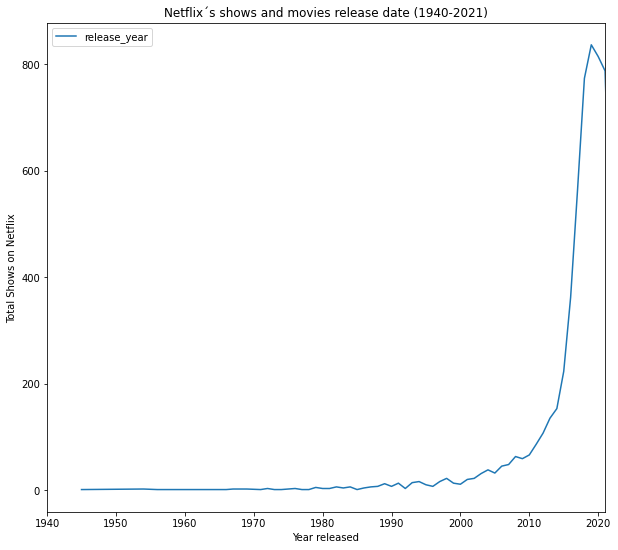

In [28]:
# Netflix´s shows and movies release date (1940-2021)
release_year_count=titles['release_year'].value_counts()
release_year_count=pd.DataFrame(release_year_count)

plt.figure(figsize=(10, 9))
sns.lineplot(data=release_year_count)
plt.title('Netflix´s shows and movies release date (1940-2021)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()

Text(0, 0.5, 'NUMBERS')

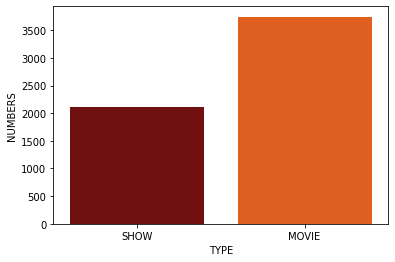

In [29]:
#Ratio between Movie & Show
sns.countplot(x='type',data=titles, palette="gist_heat")
plt.xlabel("TYPE")
plt.ylabel("NUMBERS")

#### Genres and IMDB Score

In [30]:
genres_imdb=titles.groupby('genres')[['imdb_score']].sum().reset_index()

In [31]:

fig=px.bar(x=genres_imdb["genres"],
          y=genres_imdb["imdb_score"],
          color=genres_imdb["genres"],
          color_discrete_sequence=px.colors.sequential.Plasma,
          text=genres_imdb["imdb_score"],
          title= 'Distribution IBMD Score by Geners',
          template= 'plotly_dark')

fig.update_layout(xaxis_title="Genres",
                 yaxis_title="IMDB Score",
                 font=dict(size=15, family="Franklin Gothic"))

fig.show()


#### Genres and TMDB Score

In [32]:
genres_tmdb=titles.groupby('genres')[['tmdb_score']].sum().reset_index()

In [33]:
fig=px.bar(x=genres_tmdb["genres"],
          y=genres_tmdb["tmdb_score"],
          color=genres_tmdb["genres"],
          color_discrete_sequence=px.colors.sequential.BuGn,
          text=genres_tmdb["tmdb_score"],
          title= 'Distribution TBMD Score by Geners',
          template= 'plotly_dark')

fig.update_layout(xaxis_title="Genres",
                 yaxis_title="TMDB Score",
                 font=dict(size=15, family="Franklin Gothic"))

fig.show()